You need to Perform the ETL to extract and transform the necessary data. Check the ReadMe 

In [4]:
import os

if not os.path.exists("../data/top_hits.csv"):
    raise IOError("Perfom the etl script before using this notebook. Check readme.")
else :
    print("Ready to go")

Ready to go


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/top_hits.csv")
df.head()



,year,track_name,album_name,album_release,track_popularity,track_duration_ms,artist_name,artist_followers,artist_popularity,artist_genres
0,2020,Blinding Lights,Blinding Lights,2019-11-29,26,201573,The Weeknd,107168869,97,NaN
1,2020,The Box,Please Excuse Me for Being Antisocial,2019-12-06,85,196652,Roddy Ricch,11548864,78,melodic rap
2,2020,ROXANNE,ROXANNE,2019-10-10,77,163636,Arizona Zervas,795379,63,NaN
3,2020,positions,positions,2020-10-23,2,172324,Ariana Grande,105870217,93,pop
4,2020,Say So,Hot Pink,2019-11-07,79,237893,Doja Cat,33598823,87,NaN


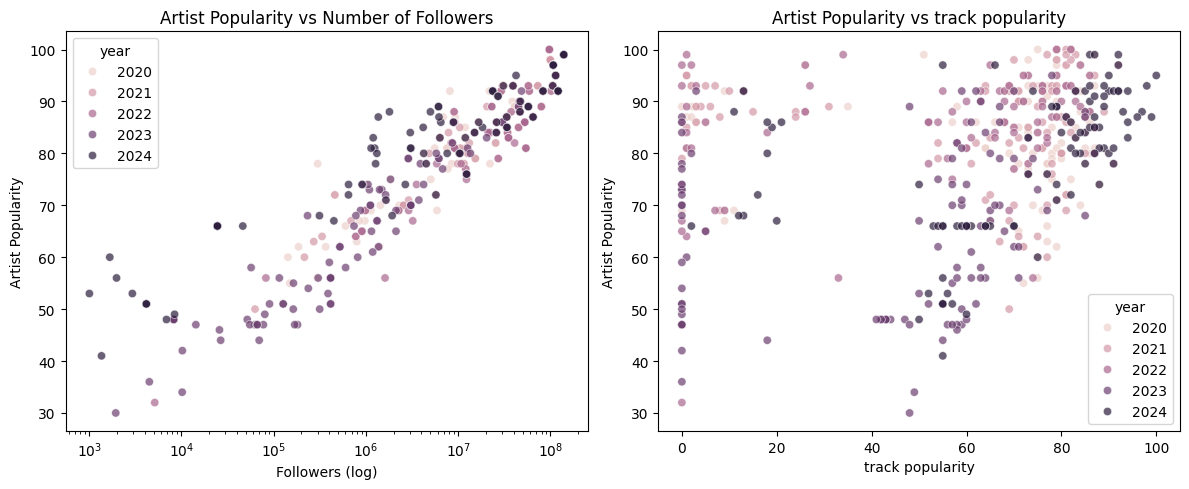

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.dropna(subset=["artist_followers", "artist_popularity", "track_popularity"])
df_corr = df_corr[df_corr["artist_followers"] > 1000]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df_corr,
    x="artist_followers",
    y="artist_popularity",
    hue="year",
    alpha=0.7
)
plt.xscale("log")
plt.title("Artist Popularity vs Number of Followers")
plt.xlabel("Followers (log)")
plt.ylabel("Artist Popularity")

plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_corr,
    x="track_popularity",
    y="artist_popularity",
    hue="year",
    alpha=0.7
)
plt.title("Artist Popularity vs track popularity")
plt.xlabel("track popularity")
plt.ylabel("Artist Popularity")

plt.tight_layout()
plt.show()


##   Artist Popularity vs Number of Followers    and    Artist Popularity vs track popularity

This scatter plot describes how artists' popularity is correlated with the number of followers they have.
The left Figure shows artists popularity vs followers.
The right Figure shows artists popularity vs the popularity of their tracks.
There is a strong correlation between the artists popularity and their number of followers: the more artists are popular the more they have followers.
It appears few correlation between their popularity and their popularity of their tracks : some artists are very popular with very few popular tracks while many very popular artists have very popular tracks.
In both cases, there no differences between the year.


In [15]:
df_genres = df.copy()
df_genres["artist_genres"] = df_genres["artist_genres"].str.split(", ")
df_genres = df_genres.explode("artist_genres")

top_genres = (
    df_genres.groupby(["year", "artist_genres"])
    .size()
    .reset_index(name="count")
)

top5_genres = top_genres.groupby("year").apply(
    lambda x: x.nlargest(5, "count")
).reset_index(drop=True)


/var/folders/2f/n5hxfl890xn8lbvln0rfth780000gn/T/ipykernel_36038/1215104982.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_genres = top_genres.groupby("year").apply(


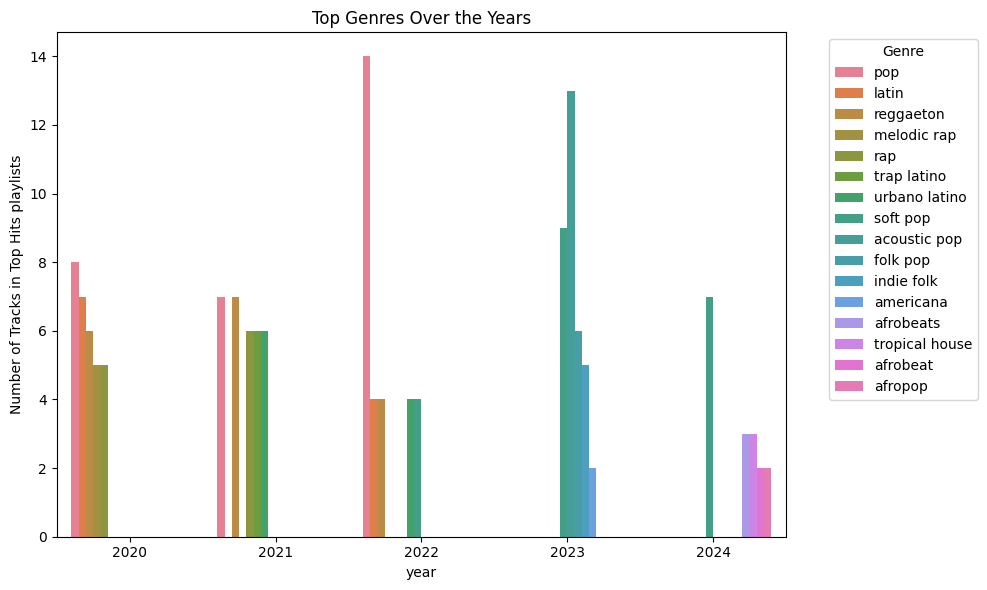

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_genres,
    x="year",
    y="count",
    hue="artist_genres"
)
plt.title("Top Genres Over the Years")
plt.ylabel("Number of Tracks in Top Hits playlists")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


##   Top Genres Over the Years

This bar chart shows the 5 most frequent genres each year in the "Top Hits of YYYY" playlists.

Pop music is the most dominant music genre all across the years. While rap as listened as pop or latin in 2020, 2021 and 2022 it seems to disappear from music trends since 2023.


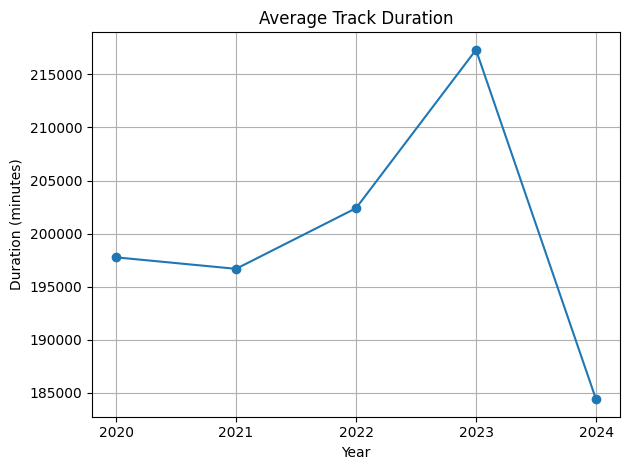

In [9]:
df.groupby("year")["track_duration_ms"].mean().plot(marker="o")
plt.title("Average Track Duration")
plt.xlabel("Year")
plt.ylabel("Duration (minutes)")
plt.xticks(df["year"].unique())  # Affiche les années entières seulement
plt.grid(True)
plt.tight_layout()
plt.show()


##   Average Track Duration (2020–2024)

This line chart shows how the average duration of tracks has changed over the five years.

The tracks duration seems to decrease in 2024 (30 second less), the mean tracks duration remains slightly above 3 minutes all years.


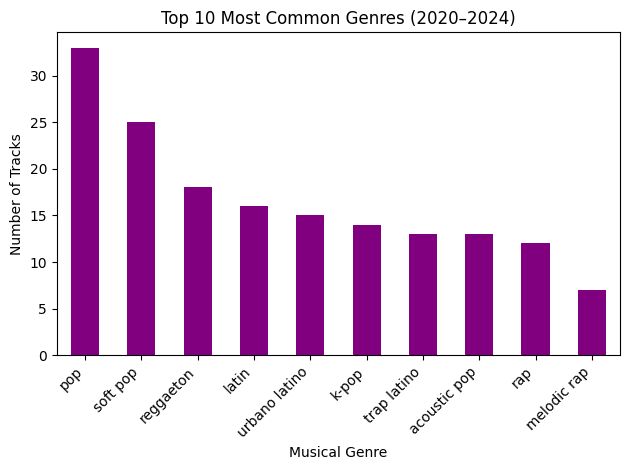

In [14]:
df_genres["artist_genres"].value_counts().nlargest(10).plot(kind="bar", color="purple")
plt.title("Top 10 Most Common Genres (2020–2024)")
plt.ylabel("Number of Tracks")
plt.xlabel("Musical Genre")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##  Most Common Genres (2020–2024)

This bar chart shows the overall top 10 genres found in the Top Hits playlists over all years combined.

As previously seen before, Pop music is the most listened musical genre and the Rap music genre is the less. One can note that Rock music or Jazz don't appear in the Top 10 musical genres.


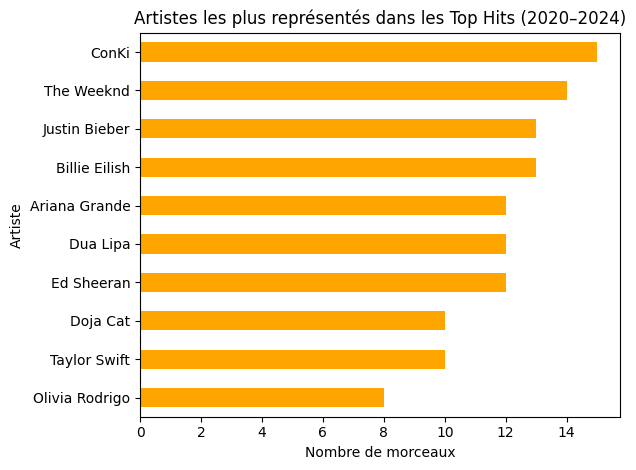

In [13]:
df["artist_name"].value_counts().nlargest(10).plot(kind="barh", color="orange")
plt.title("Artistes les plus représentés dans les Top Hits (2020–2024)")
plt.xlabel("Nombre de morceaux")
plt.ylabel("Artiste")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


##   Most Frequent Artists in Top Hits Playlists

This horizontal bar chart displays the top 10 artists that appear most frequently across all five playlists.

The Top 10 artists in the Top Hits are all from Pop music. It is notable that the 3 first artists are men while artists like Billie Ellish Dua Lipa or Taylor Swift are highly publicized artists.
